In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

# feature x= is temperature, target y= is chrips/second

In [3]:
#1. Linear Equation= y=mx+c (initially)

In [4]:
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [5]:
df.shape

(15, 2)

In [6]:
df.isnull().sum()

Chirps_Second         0
Ground_Temperature    0
dtype: int64

In [7]:
# No missing data

In [8]:
df=df.drop_duplicates()

In [9]:
# dropped duplicates if any.

In [10]:
#check for outliers in below code 

In [11]:
df.columns

Index(['Chirps_Second', 'Ground_Temperature'], dtype='object')

In [12]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


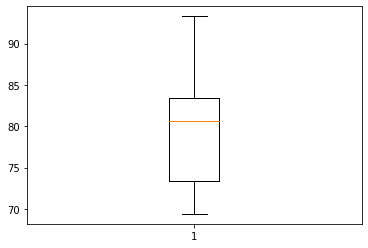

In [13]:
plt.boxplot(df.Ground_Temperature) # to check outliers.
plt.show()

In [14]:
iqr=df.Ground_Temperature.quantile(.75)-df.Ground_Temperature.quantile(.25)
upper_threshold=df.Ground_Temperature.quantile(.75)+(1.5*iqr)
print('upper threshold=',upper_threshold)
lower_threshold=df.Ground_Temperature.quantile(.25)-(1.5*iqr)
print('lower threshold=',lower_threshold)

upper threshold= 98.4
lower threshold= 58.400000000000006


In [15]:
#max value of ground temp is 93.3 and upper threshold is 98.4 so no upper thrshold outliers,
#min value of ground temp is 69.4 and lower threshold is 58.4 so no lower threshold outliers.

In [16]:
df.dtypes

Chirps_Second         float64
Ground_Temperature    float64
dtype: object

In [17]:
#data is structred

In [18]:
#check linearity EDA

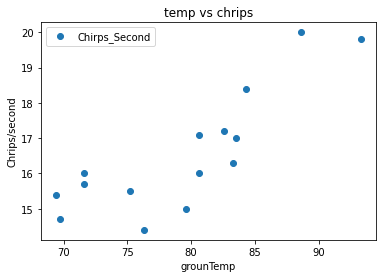

In [19]:
df.plot(x='Ground_Temperature', y='Chirps_Second', style='o')
plt.title('temp vs chrips')
plt.xlabel('grounTemp')
plt.ylabel('Chrips/second')
plt.show()

In [20]:
#there is a linerity by viewling the plot, checking correlation aswell.

In [21]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [22]:
#correlation is 0.832 which is positive strong coreation. so no transfprmation required.

# 1. Final Linear Regression quation is y=mx+c

In [23]:
#split the data

In [24]:
x=df.loc[:,['Ground_Temperature']].values
y=df.loc[:,'Chirps_Second'].values

In [25]:
from sklearn.model_selection import train_test_split #import the required function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18)

In [26]:
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [27]:
linReg.intercept_

0.12316953086536131

In [28]:
linReg.coef_

array([0.20758798])

In [29]:
y_pred=linReg.predict(x_test)

In [30]:
y_pred

array([14.59205156, 17.26993646, 17.45676564])

# 2. Chart the original data and the equation on the chart.

In [31]:
data=pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred})
data

,Actual_test,Predicted_test
0,14.7,14.592052
1,17.2,17.269936
2,17.0,17.456766


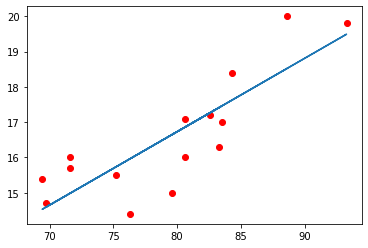

In [33]:
plt.scatter(x,y, c='red')
plt.plot(x,linReg.predict(x))
plt.show()

# 3. R2 score (.8 above is good model)

In [34]:
from sklearn import metrics 
print('R2SCORE:', metrics.r2_score(y_test,y_pred))

R2SCORE: 0.9416635158283623


In [37]:
print('R2SCORE of whole data:', metrics.r2_score(x,y))

R2SCORE of whole data: -1449.3539198182114


# 4. Extrapolate with 95 as temp

In [35]:
print('Extrapolate with 95 as temp the Chrips/second is:',linReg.predict([[95.0]]))

Extrapolate with 95 as temp the Chrips/second is: [19.84402738]


# 5. Intrapolate the temp when chrips/sec is 18

In [36]:
from scipy.interpolate import interp1d
y=df.loc[:,'Ground_Temperature'].values
x=df.loc[:,'Chirps_Second'].values
interpolate_x=18.0
y_interpolate=interp1d(x,y)
print('Interpolated temp at 18Chrips/second is:',y_interpolate(interpolate_x))

Interpolated temp at 18Chrips/second is: 83.73333333333333
